In [1]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#Classifiers
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('singloblulos.csv')
data= data.drop('CODIGO',axis=1)

In [3]:
data['SHOCK'] = data['SHOCK'].astype(int)

In [4]:
x = data.drop('SHOCK', axis=1)  # Ajusta 'etiqueta' al nombre de la columna de etiquetas
y = data['SHOCK']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify= y, random_state=42)

In [5]:
y_train.value_counts()

SHOCK
0    717
1    342
Name: count, dtype: int64

In [6]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=45)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [7]:
y_train.value_counts()

SHOCK
0    717
1    717
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes, binary= True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [10]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print('accuracy_score: {0:.4f}'.format(acc_score))
        print('cohen_kappa_score: {0:.4f}'.format(c_k_s))
        print('log_loss: {0:.4f}'.format(log_metric))
        print('zero_one_loss: {0:.4f}'.format(zero_met))
        print('hemming_loss: {0:.4f}'.format(hl))
        print('matthews_corrcoef: {0:.4f}'.format(mc))
        print('recall: {0:.4f}'.format(recall))
        print('f1_score: {0:.4f}'.format(f1))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [11]:
#classes
classes = [0, 1]

In [12]:
# select classifiers
classifiers=[
GradientBoostingClassifier(learning_rate= 0.2, max_depth= 5, n_estimators= 100),
AdaBoostClassifier(DecisionTreeClassifier(ccp_alpha= 0.0, criterion= "gini", max_depth= 30, max_features= None, min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 5, splitter= "random"),algorithm= "SAMME.R", learning_rate= 0.01, n_estimators= 200, random_state= 42),
RandomForestClassifier(criterion= "gini", max_depth= 20, max_features= "auto", min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200),
DecisionTreeClassifier(ccp_alpha= 0.0, criterion= "gini", max_depth= 30, max_features= None, min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 5, splitter= "random"),
ExtraTreesClassifier(bootstrap= True, criterion= "entropy", max_depth= 40, max_features= 2, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 150, random_state= 789),
BaggingClassifier(RandomForestClassifier(criterion= "gini", max_depth= 20, max_features= "auto", min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200),bootstrap= True, max_features= 0.9, max_samples= 0.7, n_estimators= 200),
]

names=['GB', 'ABDT', 'RF','DT', 'ET', 'BGRF']

Train runtime: 0.5952887535095215
Test runtime: 0.03355860710144043


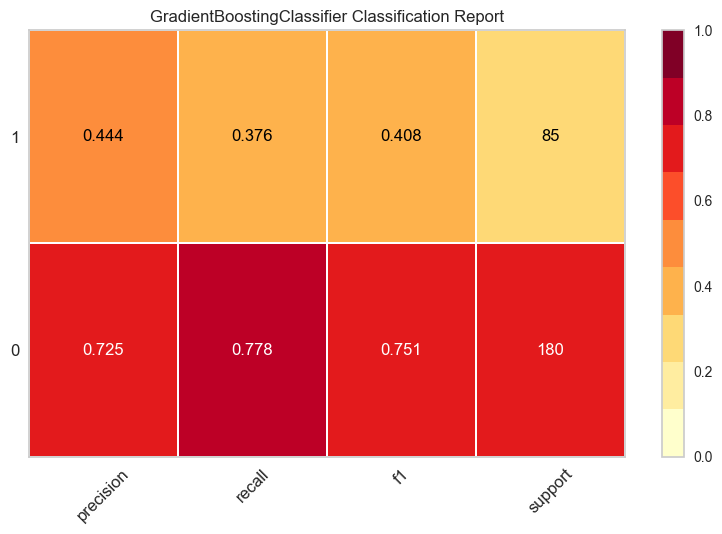

Train runtime: 1.0321495532989502
Test runtime: 0.14989256858825684


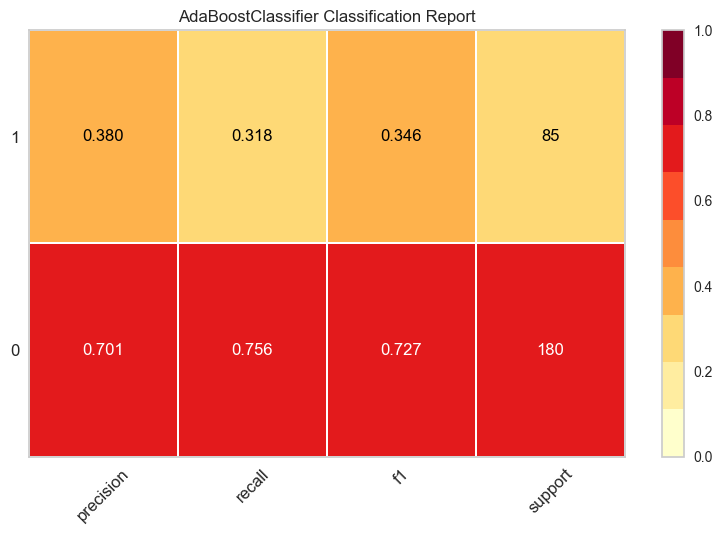

Train runtime: 0.6628320217132568
Test runtime: 0.10122323036193848


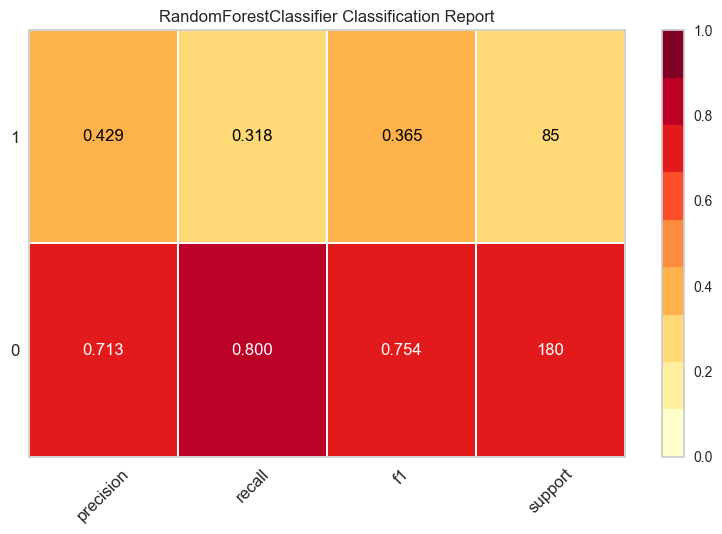

Train runtime: 0.004764556884765625
Test runtime: 0.03736543655395508


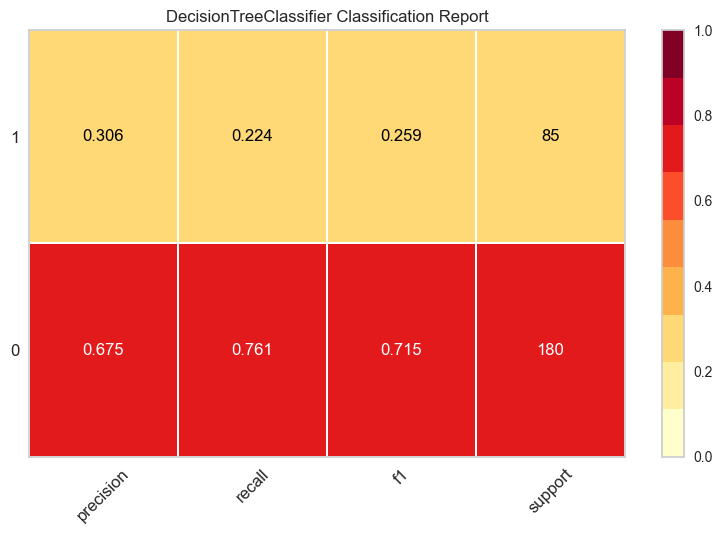

Train runtime: 0.4177713394165039
Test runtime: 0.06895065307617188


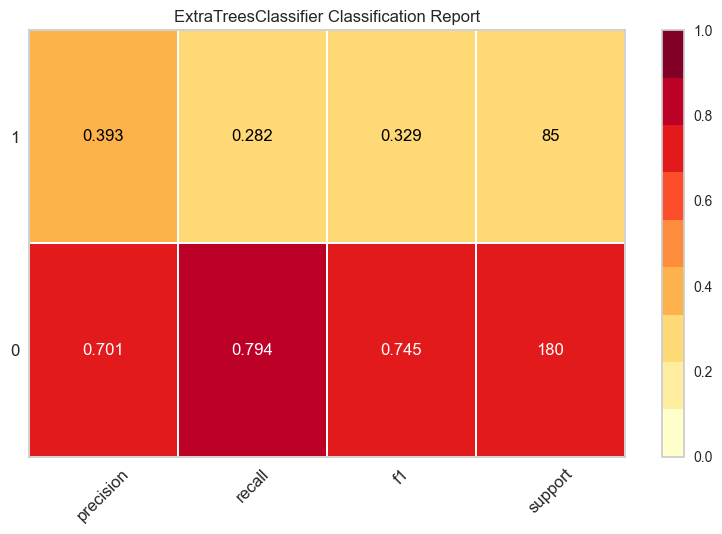

Train runtime: 91.05577182769775
Test runtime: 7.056617736816406


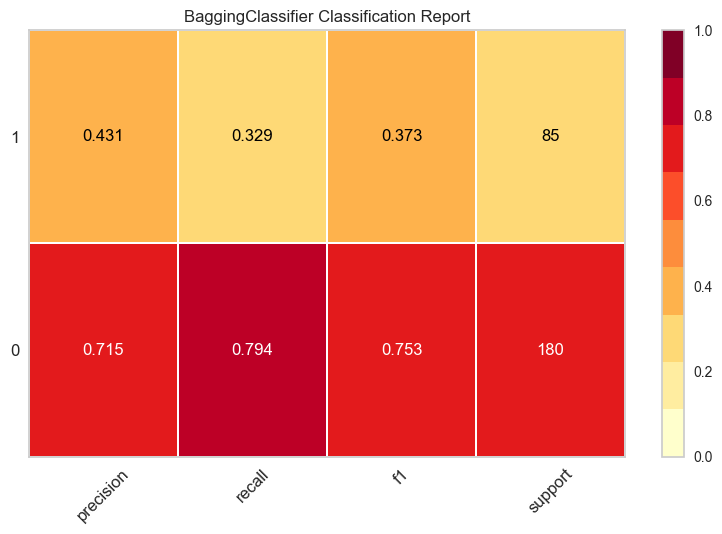

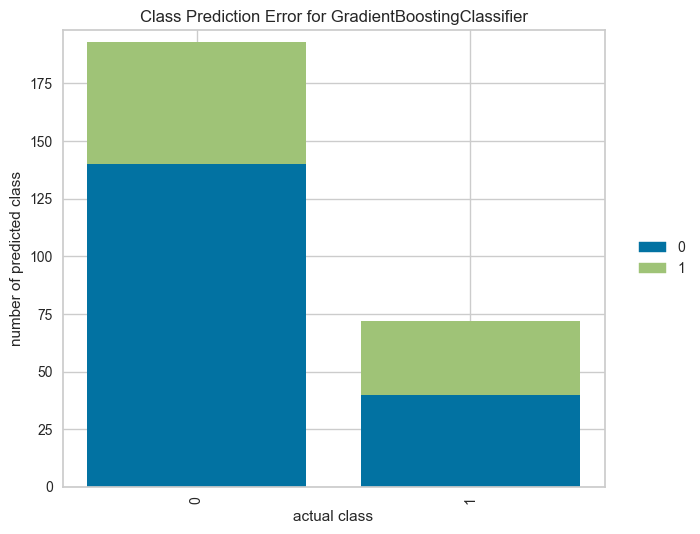

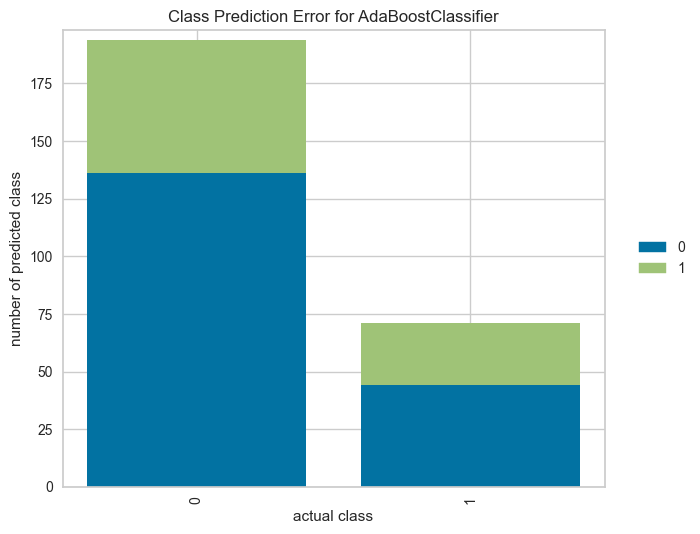

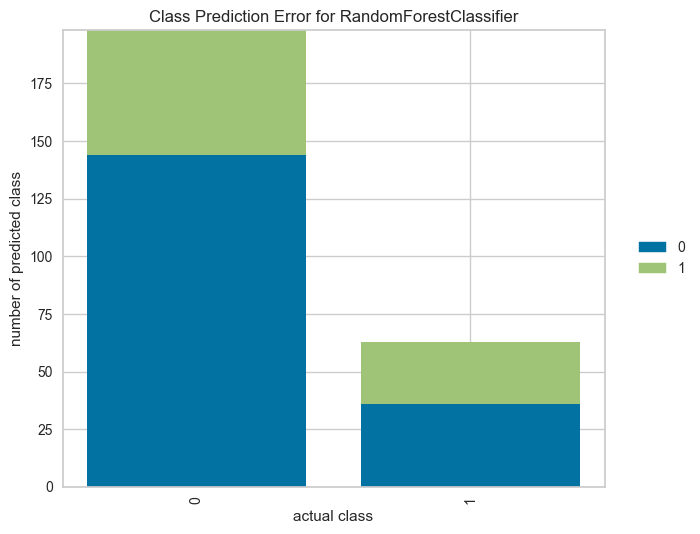

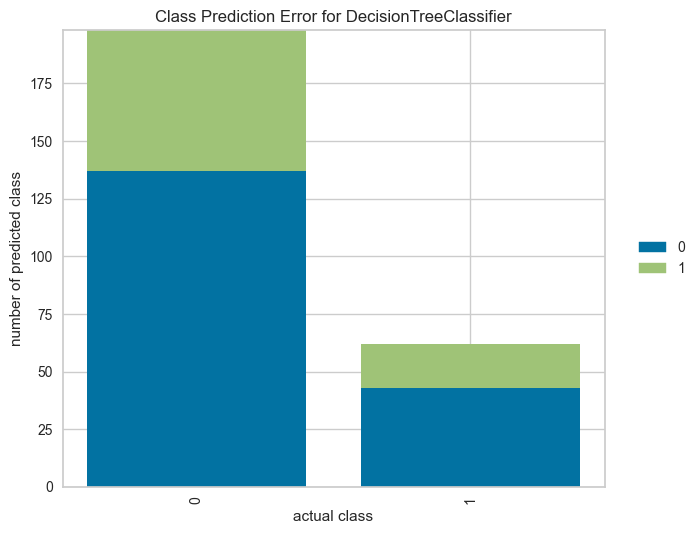

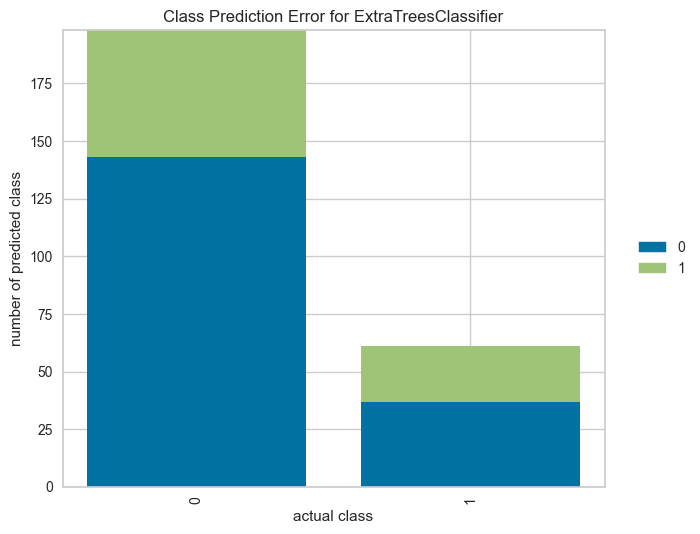

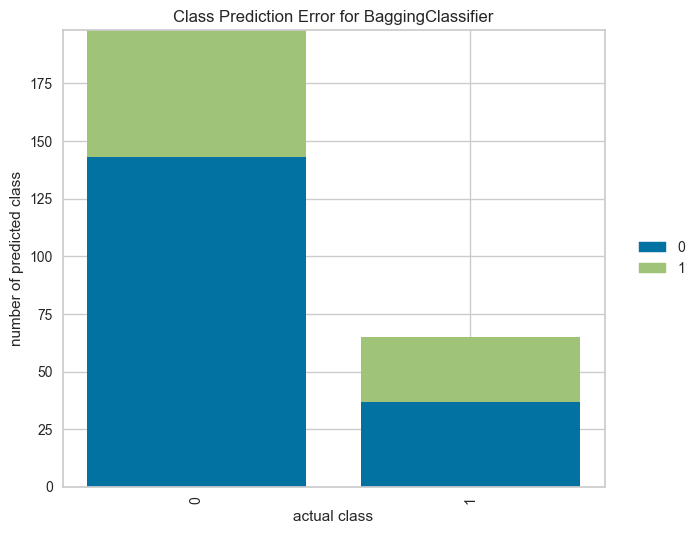

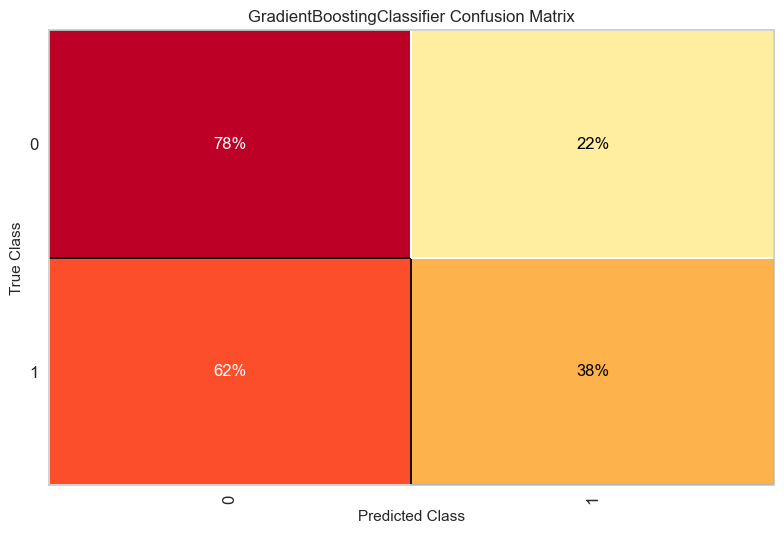

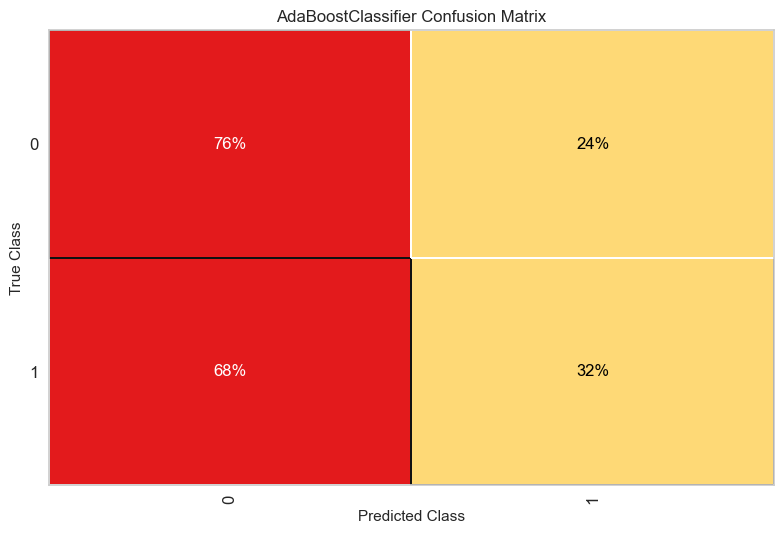

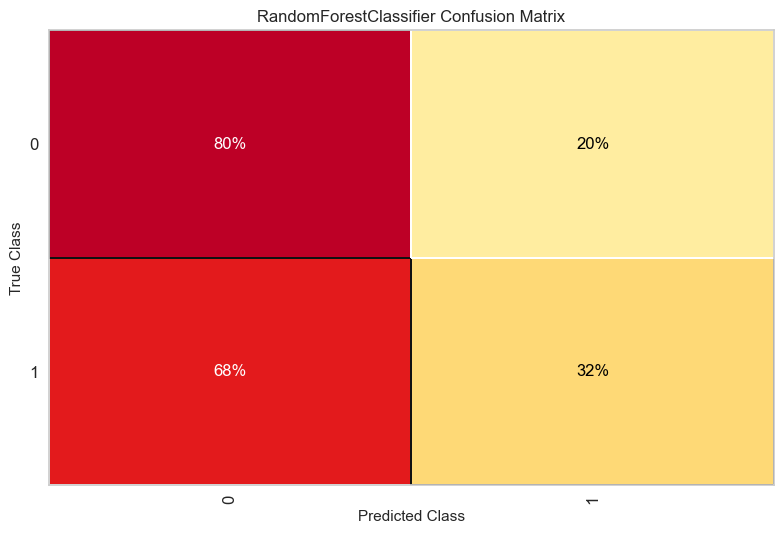

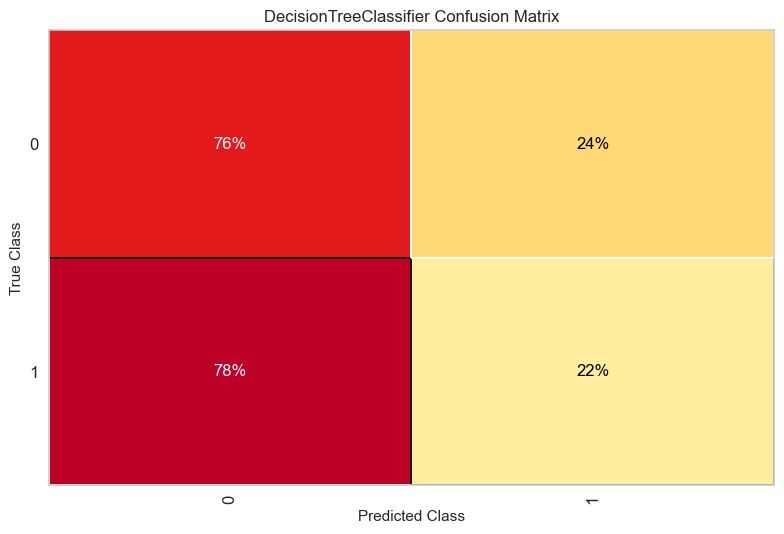

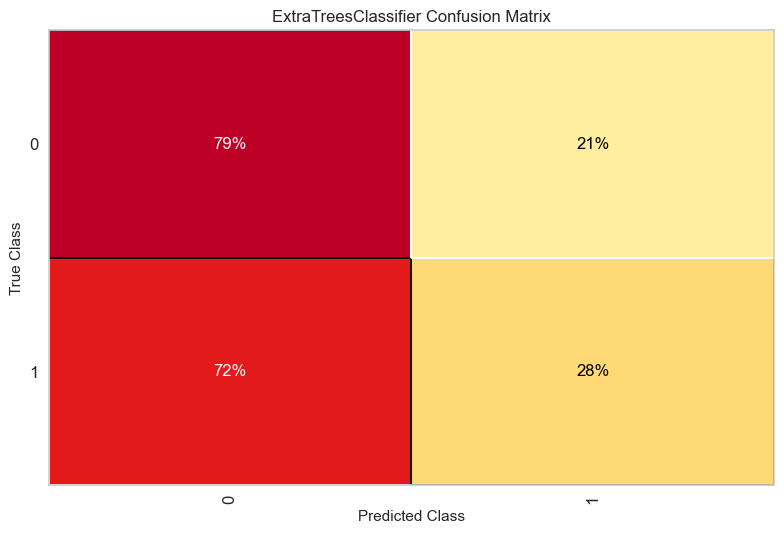

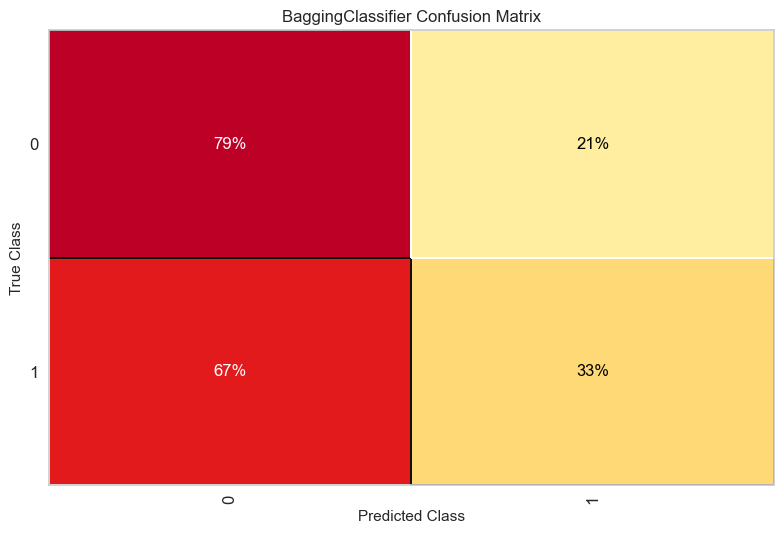

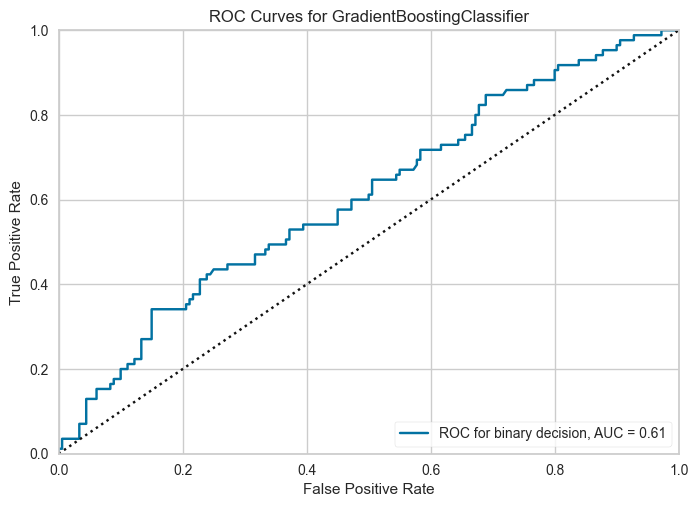

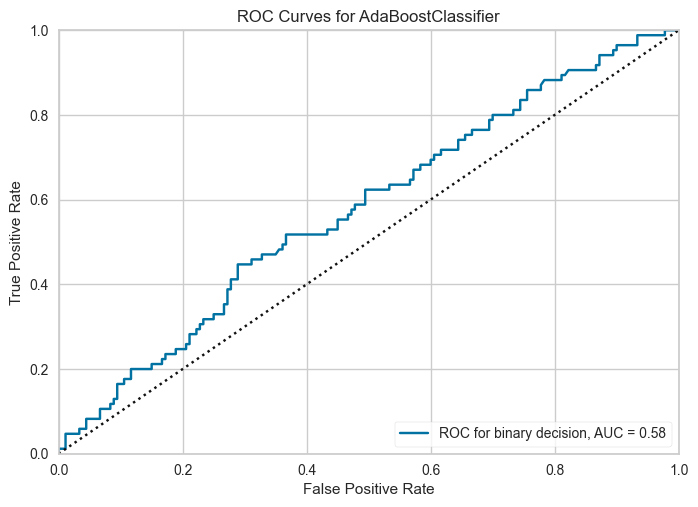

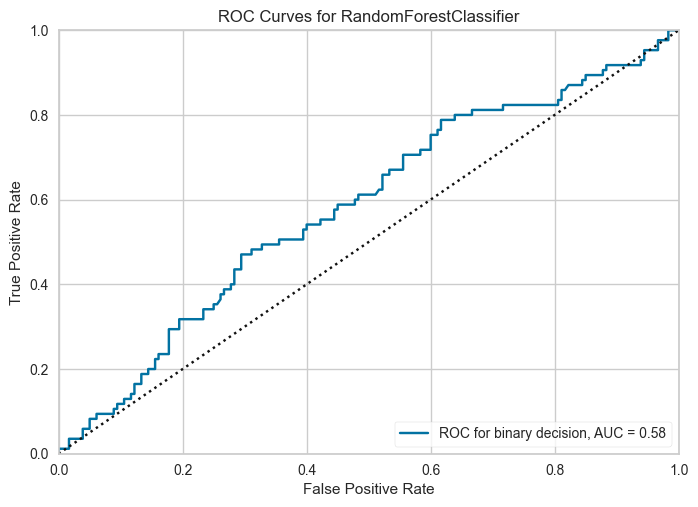

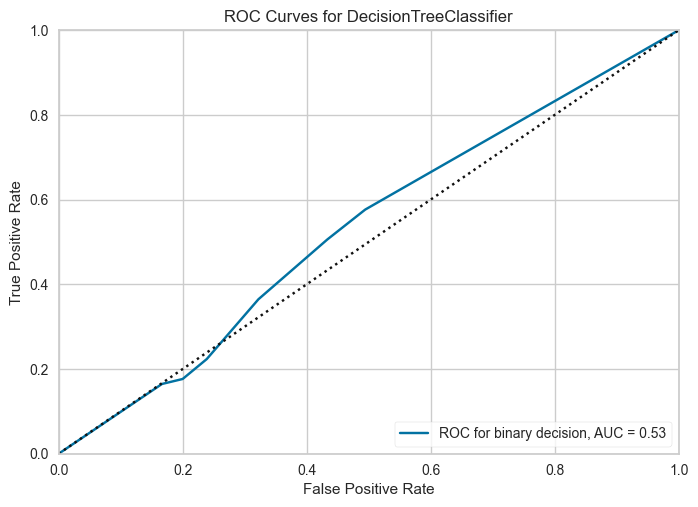

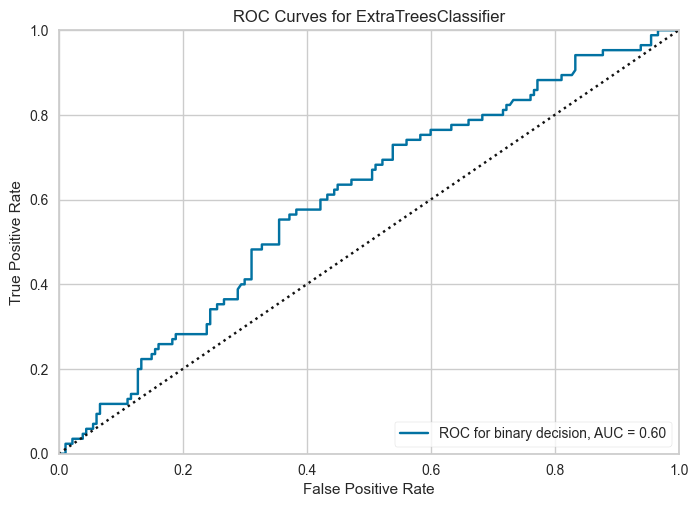

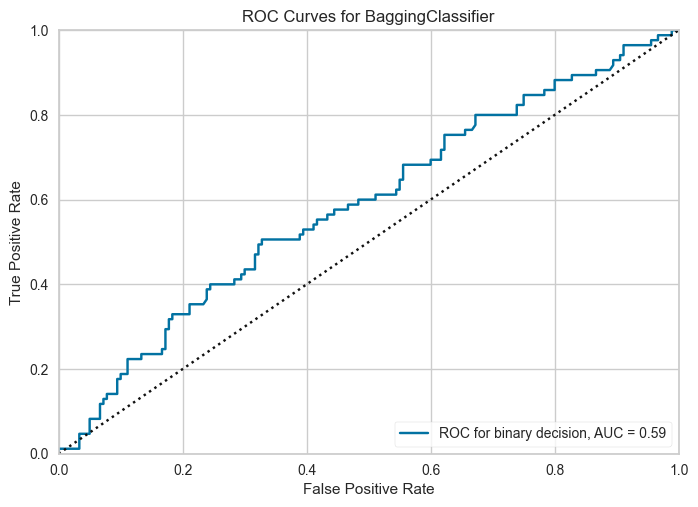

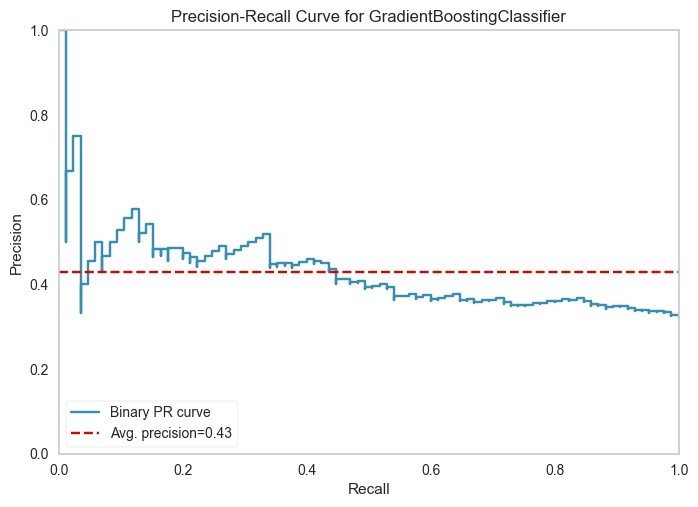

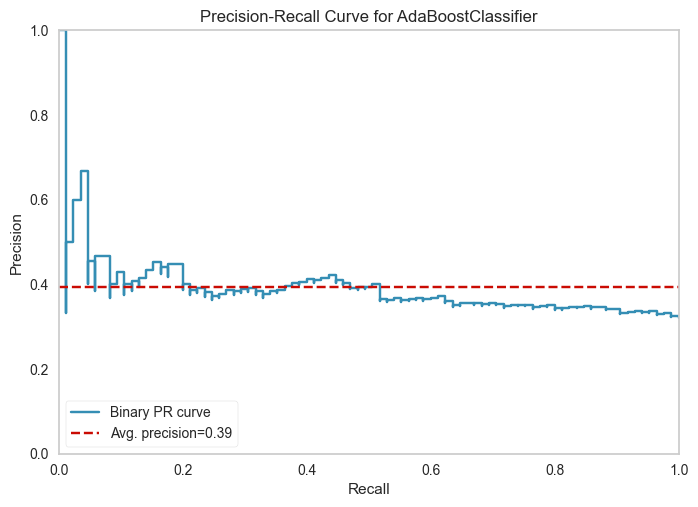

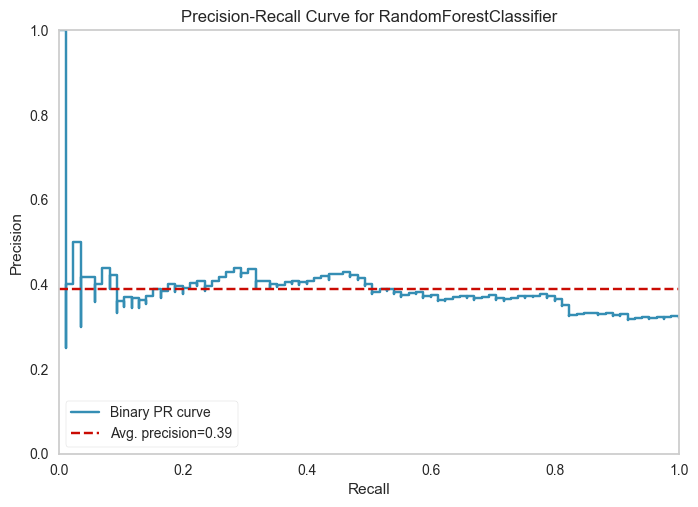

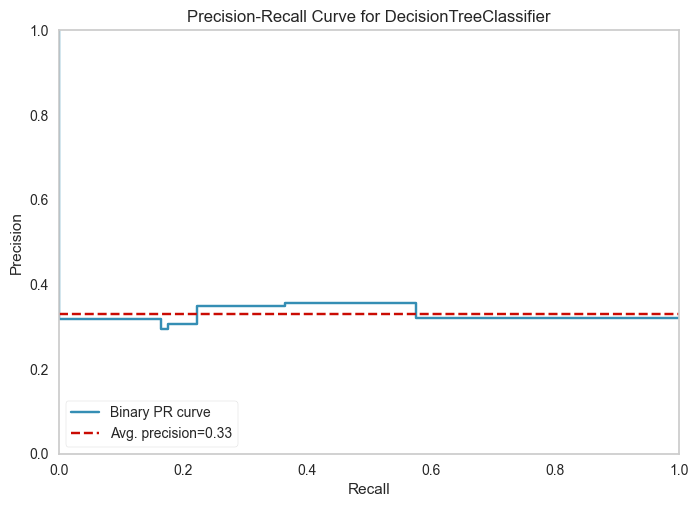

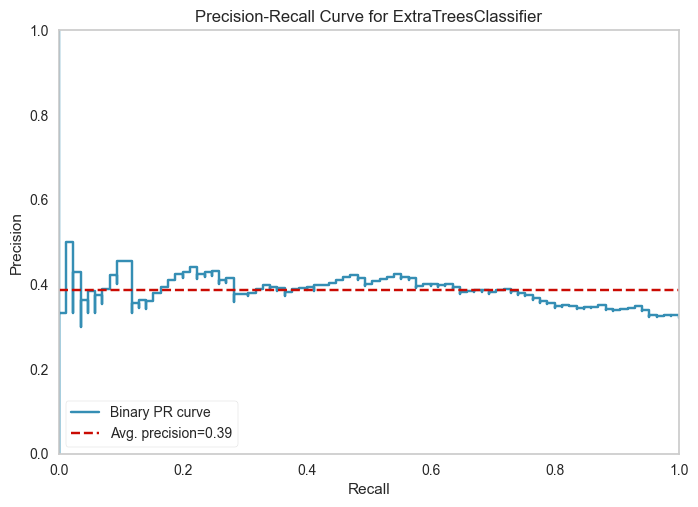

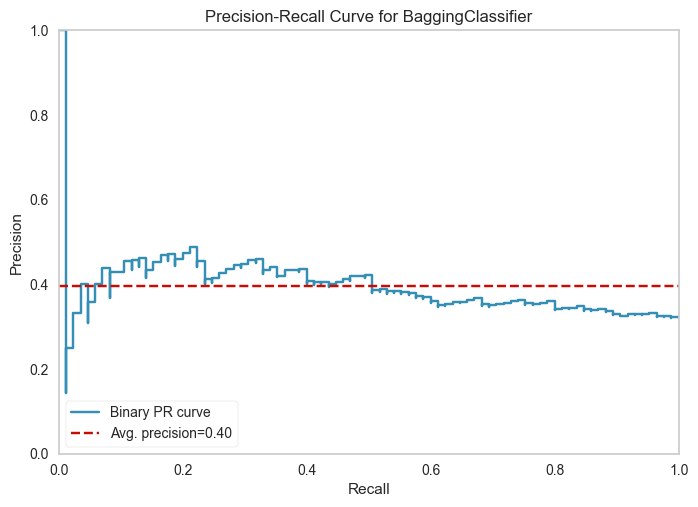

In [13]:
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [14]:
classifier_metrics()

GradientBoostingClassifier(learning_rate=0.2, max_depth=5)
accuracy_score: 0.6453
cohen_kappa_score: 0.1490
log_loss: 0.7145
zero_one_loss: 0.3547
hemming_loss: 0.3547
matthews_corrcoef: 0.1502
recall: 0.3647
f1_score: 0.3974

---------------------------------------------------------------------------------
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=30,
                                                    min_samples_split=5,
                                                    splitter='random'),
                   learning_rate=0.01, n_estimators=200, random_state=42)
accuracy_score: 0.6151
cohen_kappa_score: 0.0765
log_loss: 4.8141
zero_one_loss: 0.3849
hemming_loss: 0.3849
matthews_corrcoef: 0.0772
recall: 0.3176
f1_score: 0.3462

---------------------------------------------------------------------------------
RandomForestClassifier(max_depth=20, max_features='auto', min_samples_split=5,
                       n_estimators=200)
accuracy_score: 0.6415
cohen_kappa_s

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

for i in range(len(classifiers)):
  print(names[i])
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realiza la validación cruzada y obtén las puntuaciones de rendimiento
  puntuaciones = cross_val_score(classifiers[i], X_train, y_train, cv=kf)
  desviacion_estandar = np.std(puntuaciones)

  # Imprime las puntuaciones de rendimiento
  #print("Puntuaciones de rendimiento: ", puntuaciones)
  print("Puntuación media: ", np.mean(puntuaciones))
  print("Desviación estándar: ", desviacion_estandar)

GB
Puntuación media:  0.7092371043590555
Desviación estándar:  0.024573156023420088
ABDT
Puntuación media:  0.7210569917886992
Desviación estándar:  0.022721970228183196
RF
Puntuación media:  0.7252649789235155
Desviación estándar:  0.033801150453320904
DT
Puntuación media:  0.6771301868862843
Desviación estándar:  0.041761375168231835
ET
Puntuación media:  0.7231670768256133
Desviación estándar:  0.030929502730508828
BGRF
Puntuación media:  0.7273506980824054
Desviación estándar:  0.024525707610600123
